In [ ]:
import os
import itertools
import glob


model_tag="Oct20_TeVPA_HP_round3"

save_dir = f"/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/{model_tag}/save_dir/"
args_template = "info.model_name={model_name} model.parameters.event_branch_layers={event_branch_layers} model.parameters.muon_branch_layers={muon_branch_layers} model.parameters.muon_embedding_dim={muon_embedding_dim} model.parameters.combination_layers={combination_layers} training.epochs={epochs}"
args_template = f"{args_template} info.save_dir={save_dir} hydra.output_subdir=null"

command_template = f"python /cephfs/users/nrad/work/i3rej/run.py {args_template}"



base_layers = [64, 128, 256, 512]

layers_comb = list(itertools.product(base_layers, repeat=1)) + list(itertools.product(base_layers, repeat=2)) + list(itertools.product(base_layers, repeat=3))
combination_map = {str(x):x for x in layers_comb}
comb_keys = list(combination_map.keys())

event_branch_layers_choices = [(64,), (64, 64), (256,256), (512,), (512, 512)]
muon_branch_layers_choices = [ (256,), (64,),  (64, 64), (64, 128), (128, 128), (256, 256) ]
combination_layers_choices = [(64,), (128,), (256,), (512,), (1028,), (64, 256,256), (128, 512, 512), (64, 64, 128)]
muon_embedding_dims = [2,8, 16, 32, 64, 128, 256]

#  'D8_M128_128_E512_C256',
#  'D8_M128_128_E64_64_C1028',


muon_embedding_dims = [2,4,8,12]
muon_branch_layers_choices = [ (64,64,64), (32,32,32), (32,32), (64, 32), (32, 64), (32,32,32,32), (64,64,64,64), (128,128,128), (128, 128)]
combination_layers_chocies = [ (256,), (1028, ), (32, 32), (32, 32, 32), (32, 64), (32, 64, 64), (64, 64, 128), (64, 32), (64, 64, 64), (128, 128, 128)]
event_branch_layers_choices = [ (64,), (64, 64), (256,256), (512,), (512, 512), (32, 32), (32, 32, 32), (32, 32, 32, 32), (64, 64, 64, 64), (128, 128, 128, 128)]


muon_embedding_dims = [4, 8, 12, 16]
muon_branch_layers_choices = [ (64, 64, 64), (48, 48, 48,), ()]
event_branch_layers_choices = [ (64, ), (32, 32), (64, 64), (256,), (64, 64, 32) ] 
combination_layers_choices = [ (1028,), (2048,), (512,), (768,), (512, 512),  ]

def make_string_list(layers):
    return "'[{}]'".format(",".join([str(x) for x in layers]))

commands = []
already_done = []
for event_branch_layers in event_branch_layers_choices:
    etag = "E{}".format("_".join([str(x) for x in event_branch_layers]))
    for muon_branch_layers in muon_branch_layers_choices :
        mtag = "M{}".format("_".join([str(x) for x in muon_branch_layers]))
        for combination_layers in combination_layers_choices:
        # for combination_layers in [(64,), ]:
            ctag = "C{}".format("_".join([str(x) for x in combination_layers]))
            for muon_embedding_dim in muon_embedding_dims:
                embtag = f"D{muon_embedding_dim}"
                model_name = f"{embtag}_{mtag}_{etag}_{ctag}"
                model_output = f'{save_dir}/{model_name}/speedup.pkl'
                if os.path.exists(model_output):
                    already_done.append(model_name)
                    continue
                command = command_template.format(model_name=model_name, 
                                                    event_branch_layers=make_string_list(event_branch_layers),  
                                                    muon_branch_layers=make_string_list(muon_branch_layers),
                                                    combination_layers=make_string_list(combination_layers),
                                                    muon_embedding_dim=muon_embedding_dim, 
                                                    epochs=50)
                # command = command_template.format(model_tag=model_tag, 
                #                                     model_name=model_name,
                #                                     event_branch_layers=" ".join([str(x) for x in event_branch_layers]), 
                #                                     muon_branch_layers=" ".join([str(x) for x in muon_branch_layers]),
                #                                     combination_layers=" ".join(str(x) for x in combination_layers),
                #                                     muon_embedding_dim=muon_embedding_dim, 
                #                                     n_epoch=50)
                commands.append(command)
                #print(model_name)

print(f'total: {len(commands)}')
print(f'already done: {len(already_done)}')

job_file = f"/cephfs/users/nrad/work/i3rej/manual_hp/{model_tag}.txt"
print("\n".join(commands), file=open(job_file, "w") )
print(f'jobs written to:\n{job_file}')

total: 150
already done: 0
jobs written to:
/cephfs/users/nrad/work/i3rej/manual_hp/Oct20_TeVPA_HP_round3.txt


In [166]:
ll /cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP_round2/save_dir/

total 22336
drwxr-sr-x 2 nrad 8192 Oct 29 15:43 D12_M128_128_128_E128_128_128_128_C128/
drwxr-sr-x 2 nrad 8192 Oct 29 12:24 D12_M128_128_128_E256_256_C1028/
drwxr-sr-x 2 nrad 8192 Oct 29 12:06 D12_M128_128_128_E256_256_C128/
drwxr-sr-x 2 nrad 8192 Oct 29 12:53 D12_M128_128_128_E256_256_C128_512_512/
drwxr-sr-x 2 nrad 8192 Oct 29 12:16 D12_M128_128_128_E256_256_C256/
drwxr-sr-x 2 nrad 8192 Oct 29 12:04 D12_M128_128_128_E256_256_C512/
drwxr-sr-x 2 nrad 8192 Oct 29 12:14 D12_M128_128_128_E256_256_C64/
drwxr-sr-x 2 nrad 8192 Oct 29 12:50 D12_M128_128_128_E256_256_C64_256_256/
drwxr-sr-x 2 nrad 8192 Oct 29 12:23 D12_M128_128_128_E256_256_C64_64_128/
drwxr-sr-x 2 nrad 8192 Oct 29 14:48 D12_M128_128_128_E32_32_32_32_C1028/
drwxr-sr-x 2 nrad 8192 Oct 29 14:45 D12_M128_128_128_E32_32_32_32_C128/
drwxr-sr-x 2 nrad 8192 Oct 29 14:56 D12_M128_128_128_E32_32_32_32_C128_512_512/
drwxr-sr-x 2 nrad 8192 Oct 29 14:49 D12_M128_128_128_E32_32_32_32_C256/
drwxr-sr-x 2 nrad 8192 Oct 29 14:51 D12_M128_128_1

python /cephfs/users/nrad/work/i3rej/run.py info.model_name=D2_M64_64_64_E64_C64 model.parameters.event_branch_layers='[64]' model.parameters.muon_branch_layers='[64,64,64]' model.parameters.muon_embedding_dim=2 model.parameters.combination_layers='[64]' training.epochs=50 info.save_dir=/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP_round2/save_dir/ hydra.output_subdir=null


In [174]:
save_dir

'/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP_round3/save_dir/'

In [172]:
import glob
import os
import pickle

# save_dir = "/cephfs/users/nrad/lustre/www/plots/tfxkit/v0.0.8/Cscd_v0.0.12/20904/Oct20_TeVPA_HP_10epochs/save_dir"

model_dirs = glob.glob(f"{save_dir}/*/")
# model_names = [os.path.basename(model.rstrip("/")) for model in models]
print("found {} models".format(len(model_dirs)))
results = {}
for model_dir in model_dirs:
    model_name = os.path.basename(model_dir.rstrip("/"))
    # print(model_name)
    speedup_res_path = f"{model_dir}/speedup.pkl"
    if not os.path.exists(speedup_res_path):
        continue
    speedup_res = pickle.load(open(speedup_res_path, "rb"))
    results[model_name] = speedup_res[model_name]['speed_normed']
    
    
print(f"found {len(results)} models with speedup results")

found 32 models
found 32 models with speedup results


[('D12_M64_64_64_E32_32_C1028', np.float64(2.2168834935332113)),
 ('D4_M64_64_64_E64_C512_512', np.float64(2.0957130860341646)),
 ('D4_M50_50_50_E64_C512', np.float64(2.0793975344365037)),
 ('D4_M64_64_64_E64_C2048', np.float64(2.0441840907439524)),
 ('D16_M64_64_64_E64_C768', np.float64(2.02054632963176)),
 ('D16_M50_50_50_E64_C512_512', np.float64(2.018596468348298)),
 ('D16_M64_64_64_E64_C1028', np.float64(2.0437753711625883)),
 ('D4_M50_50_50_E64_C768', np.float64(2.0046587611691375)),
 ('D12_M64_64_64_E64_C512_512', np.float64(1.989134893912468)),
 ('D12_M50_50_50_E64_C512_512', np.float64(1.983711608602138))]

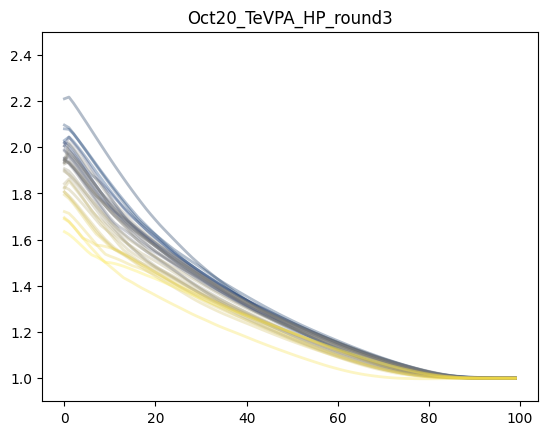

In [173]:

import matplotlib.pyplot as plt
import numpy as np



good_speedups = [(k,v) for k,v in results.items() if np.max(v) > 1.1]
good_speedups = sorted(good_speedups, key=lambda x: x[1][0] , reverse=True)
good_speedups = good_speedups[:500]
cmap = plt.get_cmap('cividis')

colors = cmap(np.linspace(0, 1, len(good_speedups)))


imodel = 0
for model_name, speedup in good_speedups:
    plt.plot(speedup, label=model_name, color=colors[imodel], alpha=0.3, lw=2 )
    imodel += 1
plt.ylim(0.9, 2.5)
plt.title(f'{model_tag}')
[ (k[0], np.max(k[1]) ) for k in good_speedups[:10]]




In [120]:
df.sort_values(by='max_speedup', ascending=False)

best_model = df.iloc[0]
best_model

max_speedup                              2.226776
model          (4, (64, 64, 64), (512,), (1028,))
D                                               4
M                                        64_64_64
E                                             512
C                                            1028
Name: 571, dtype: object

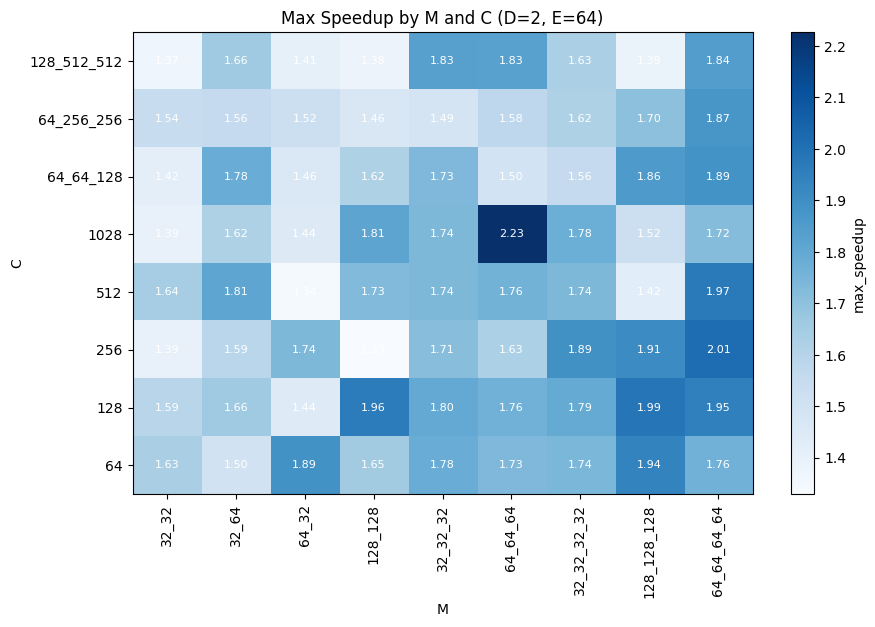

In [125]:
import re
import pandas as pd

# Let's use a sequential color palette with higher contrast for visibility of subtle differences.


def parse_model_name(string):
    # Improved regex to support multiple numbers per part (e.g., C128_128, M32_64)
    pattern = r"D(\d+)_M((?:\d+_?)+)_E((?:\d+_?)+)_C((?:\d+_?)+)"
    match = re.match(pattern, string)
    if not match:
        return []
    # Split the multi-number groups by "_" and keep as tuples of strings (or map to int as needed)
    d = match.group(1)
    m = tuple(match.group(2).split('_'))
    e = tuple(match.group(3).split('_'))
    c = tuple(match.group(4).split('_'))
    return (d, m, e, c)
    
model_summaries = { parse_model_name(k):np.max(v) for k,v in results.items() }
df = pd.DataFrame(pd.Series(model_summaries), columns=['max_speedup'])
df['model'] = df.index
df['D'] = df.index.map(lambda x: str(x[0]) )
df['M'] = df.index.map(lambda x: '_'.join(str(y) for y in x[1])  )
df['E'] = df.index.map(lambda x: '_'.join(str(y) for y in x[2])  )
df['C'] = df.index.map(lambda x: '_'.join(str(y) for y in x[3])  )

df.reset_index(drop=True, inplace=True)
df.sort_values(by='max_speedup', ascending=False, inplace=True)


import matplotlib.pyplot as plt
best_model = df.iloc[0]

hyper_layers = ['D', 'M', 'E', 'C']
best_layers = {'D': best_model.D, 'M': best_model.M, 'E': best_model.E, 'C': best_model.C}

df_selected = df.query(f"D=='{best_layers['D']}' and E=='{best_layers['E']}'")
# for hyper_layer in hyper_layers:



plt.figure(figsize=(10,6))
# Create a pivot table for heatmap data
def count_connected_components(x):
    import numpy as np  
    vals = [np.prod([int(y) for y in str(label).split('_')]) for label in x]
    return vals



pivot = df_selected.pivot(index='C', columns='M', values='max_speedup')
pivot = pivot.sort_index(axis=0, key=count_connected_components)  # sort rows (C)
pivot = pivot.sort_index(axis=1, key=count_connected_components)  # sort columns (M)

# Besides "viridis", some other colormaps with high contrast are "plasma", "inferno", "magma", "cividis" (all perceptually uniform),
# or for even more dramatic contrast, try "Spectral", "RdYlBu", or "cubehelix".
# The "Spectral" and "RdYlBu" cmaps are especially good for making differences pop.
plt.imshow(pivot, aspect='auto', cmap='Blues', origin='lower')
plt.xlabel('M')
plt.ylabel('C')
plt.title('Max Speedup by M and C (D=2, E=64)')
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns, rotation=90)
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)
cbar = plt.colorbar()
cbar.set_label('max_speedup')

# Annotate the heatmap cells with values
for i, c in enumerate(pivot.index):
    for j, m in enumerate(pivot.columns):
        val = pivot.loc[c, m]
        if not pd.isnull(val):
            plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='w', fontsize=8)



In [123]:
df

,max_speedup,model,D,M,E,C
571,2.226776,"(4, (64, 64, 64), (512,), (1028,))",4,64_64_64,512,1028
836,2.212415,"(12, (64, 64, 64, 64), (64, 64), (256,))",12,64_64_64_64,64_64,256
859,2.181052,"(4, (64, 64, 64), (64, 64), (512,))",4,64_64_64,64_64,512
1539,2.164612,"(2, (64, 64, 64), (512, 512), (256,))",2,64_64_64,512_512,256
798,2.136733,"(4, (128, 128), (32, 32), (512,))",4,128_128,32_32,512
...,...,...,...,...,...,...
855,1.000000,"(2, (128, 128), (32, 32), (128,))",2,128_128,32_32,128
717,1.000000,"(2, (128, 128), (32, 32), (128, 512, 512))",2,128_128,32_32,128_512_512
407,1.000000,"(12, (64, 64, 64, 64), (32, 32), (512,))",12,64_64_64_64,32_32,512
153,1.000000,"(4, (128, 128), (64,), (128,))",4,128_128,64,128


In [129]:
to_tuple("128_128")

(128, 128)

/tmp/ipykernel_25620/2787772229.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = sub.pivot_table(index=y, columns=x, values=value, aggfunc="mean")


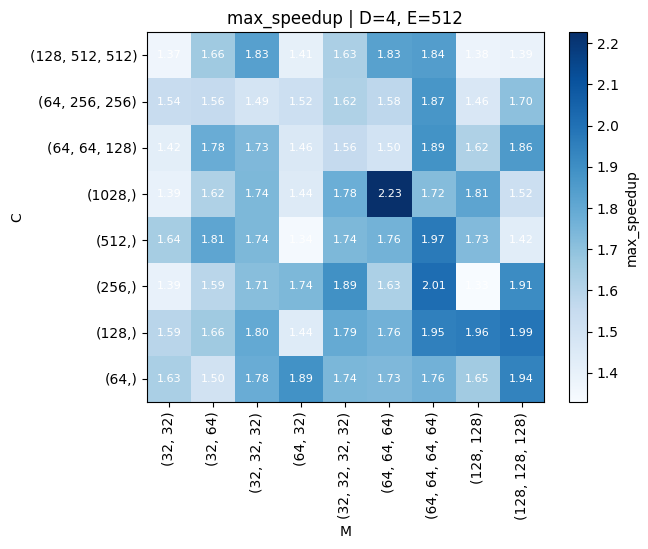

In [157]:
import ast, numpy as np, pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

def to_tuple(x):
    if isinstance(x, (list, tuple)): 
        return tuple(x)

    if isinstance(x, str): 
        x = x.split("_")
        x = [int(y) for y in x]
        return tuple(x)

    else:
        try:
            return [int(y) for y in x]
        except:
            raise ValueError(f"Could not convert {type(x)=} {x} to tuple")
    # if isinstance(x, str): 
    #     x = x.split("_")
    #     return tuple(ast.literal_eval(x))
    # return (int(x),)  # e.g. 1028

for col in ["M","E","C"]:
    df[col] = df[col].map(to_tuple)

def layer_weight_estimate(layers, in_dim=1):
    """Approximate #weights given layer widths."""
    layers = list(layers)
    sizes = [in_dim] + layers
    return sum(a*b for a,b in zip(sizes[:-1], sizes[1:]))

# def tuple_key(t):
#     # depth, total size, then tuple itself for tie-breaks
#     return (len(t), sum(t), t)

def tuple_key(t):
    w = layer_weight_estimate(t)
    return (w, len(t), sum(t))


def ordered_cats(values):
    uniq = sorted({to_tuple(v) for v in values}, key=tuple_key)
    return pd.Categorical(values, categories=uniq, ordered=True)

def plot_slice(df, fix: dict, x="M", y="C", value="max_speedup",
               title=None, cmap="cividis", log=False, annotate=True,
               ax=None,
               cmap_range=None
               ):
    # filter
    q = np.ones(len(df), dtype=bool)
    for k,v in fix.items():
        v = to_tuple(v) if k in {"M","E","C"} else v
        q &= (df[k]==v)
    sub = df.loc[q].copy()
    if sub.empty:
        print("No rows match", fix); return

    # categorical ordering
    sub[x] = ordered_cats(sub[x])
    sub[y] = ordered_cats(sub[y])

    # pivot (mean handles rare duplicates safely)
    piv = sub.pivot_table(index=y, columns=x, values=value, aggfunc="mean")

    # plt.figure(figsize=(10,6))
    if ax is None:
        ax = plt.gca()
    norm = LogNorm(vmin=max(piv.min().min(), 1e-6), vmax=piv.max().max()) if log else None
    im = ax.imshow(piv.values, aspect="auto", cmap=cmap, origin="lower", norm=norm)
    ax.set_xlabel(x); ax.set_ylabel(y)
    ax.set_title(title or f"{value} | " + ", ".join(f"{k}={v}" for k,v in fix.items()))
    ax.set_xticks(range(piv.shape[1]), [tuple(c) for c in piv.columns], rotation=90)
    ax.set_yticks(range(piv.shape[0]), [tuple(i) for i in piv.index])
    cbar = plt.colorbar(im); cbar.set_label(value)

    if cmap_range is not None:
        im.set_clim(cmap_range[0], cmap_range[1])
    if annotate:
        for i in range(piv.shape[0]):
            for j in range(piv.shape[1]):
                val = piv.iat[i,j]
                if pd.notna(val):
                    plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="w", fontsize=8)

# Example: fix D and E to the best model’s values; map M×C
plot_slice(df,
           fix={"D": best_model.D, "E": best_model.E},
           x="M", y="C",
           value="max_speedup",
        #    title="Max speedup vs M×C at best D,E",
           cmap="Blues", log=False)



In [164]:
best_model

max_speedup                              2.226776
model          (4, (64, 64, 64), (512,), (1028,))
D                                               4
M                                        64_64_64
E                                             512
C                                            1028
Name: 634, dtype: object

/tmp/ipykernel_25620/2787772229.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = sub.pivot_table(index=y, columns=x, values=value, aggfunc="mean")
/tmp/ipykernel_25620/2787772229.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = sub.pivot_table(index=y, columns=x, values=value, aggfunc="mean")
/tmp/ipykernel_25620/2787772229.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = sub.pivot_table(index=y, columns=x, values=value, aggfunc="mean")
/tmp/ipykernel_25620/2787772229.py:65

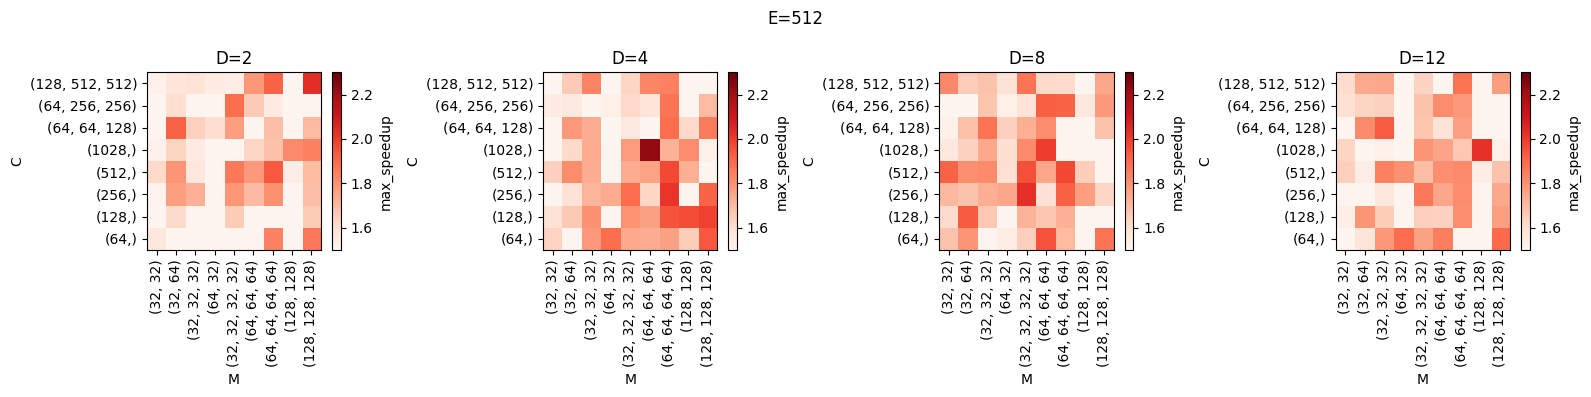

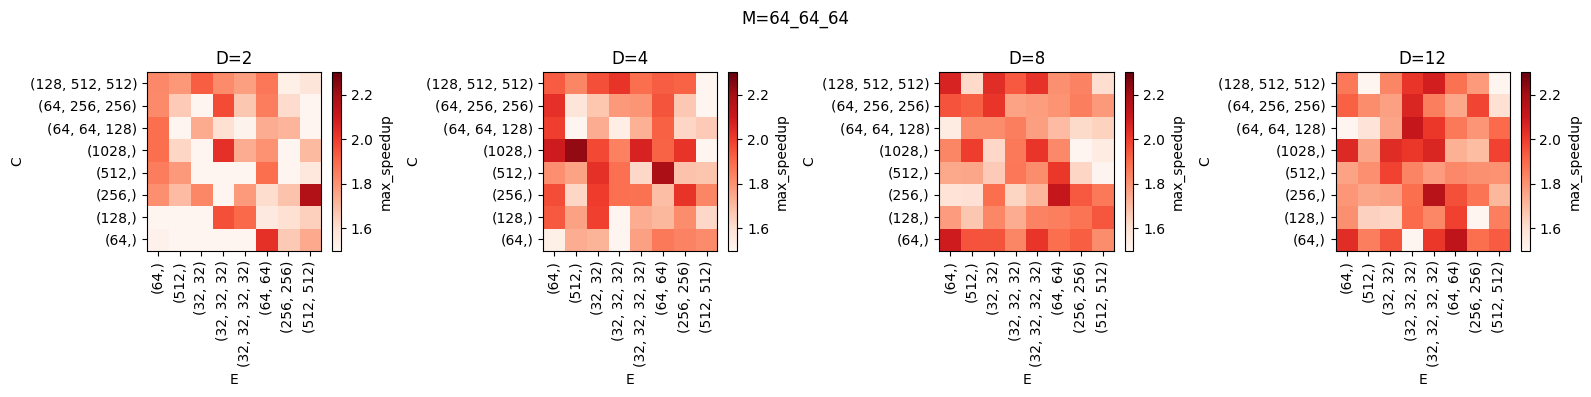

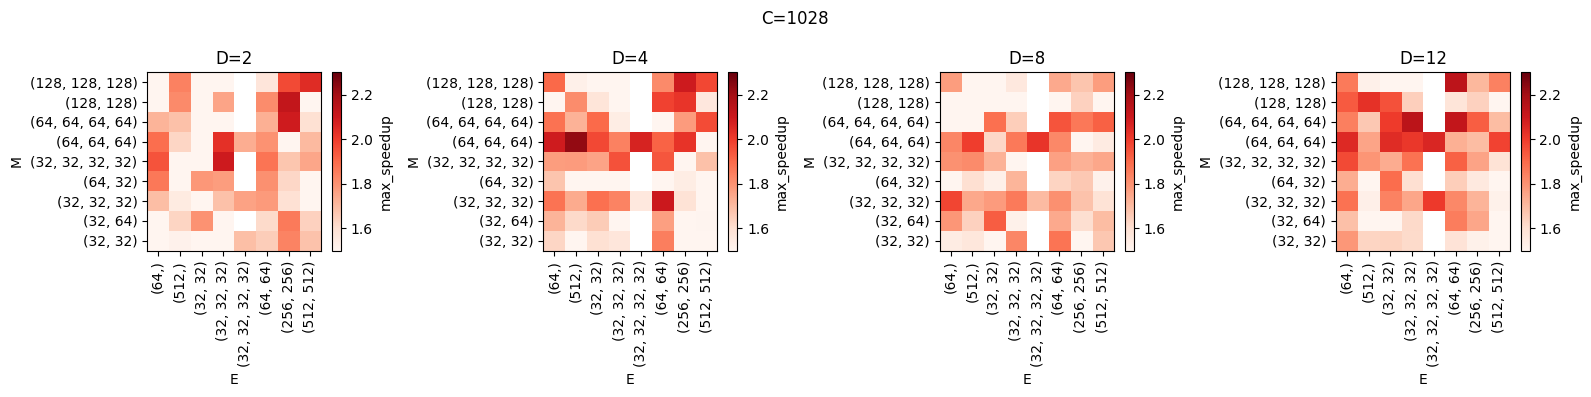

In [163]:
def facet_slices(df, profile_key, profile_values, fix_key, fix_value, x="M", y="C", cmap_range=None):
    n = len(profile_values)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4), squeeze=False)
    for ax, v in zip(axes[0], profile_values):
        plt.sca(ax)
        plot_slice(df, {profile_key:v,  fix_key: fix_value}, x=x, y=y,
                   value="max_speedup",
                   cmap="Reds",
                   title=f"{profile_key}={v}",
                   annotate=False, cmap_range=cmap_range)
    fig.suptitle(f"{fix_key}={fix_value}")
    plt.tight_layout()


# Example: sweep D while fixing E to best E

cmap_range = (1.5,2.3)

Ds = sorted(df["D"].unique(), key=lambda x: layer_weight_estimate(to_tuple(x)))
facet_slices(df, "D", Ds, "E", best_model.E, x="M", y="C", cmap_range=cmap_range)

facet_slices(df, "D", Ds, "M", best_model.M, x="E", y="C", cmap_range=cmap_range)

facet_slices(df, "D", Ds, "C", best_model.C, x="E", y="M", cmap_range=cmap_range)

# Es = sorted(df["E"].unique())
# facet_slices(df, "E", Es, "D", best_model.D, x="M", y="C", cmap_range=cmap_range)

# Ms = sorted(df["M"].unique())
# facet_slices(df, "M", Ms, "D", best_model.D, x="E", y="C", cmap_range=cmap_range)

# Cs = sorted(df["C"].unique())
# facet_slices(df, "C", Cs, "D", best_model.D, x="E", y="M", cmap_range=cmap_range)











In [156]:
import keras
import pandas as pd
model_dirs

# df = pd.read_hdf("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.hdf5")
df_test = pd.read_parquet("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.parquet", engine='fastparquet')
df_train = pd.read_parquet("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.parquet", engine='fastparquet')

import speedup_utils
import custom_model

features = ['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'log_energy_per_nucleon', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min', 'mu_log_energy_max', 'mu1_radius', 'mu2_radius', 'mu3_radius', 'mu4_radius', 'mu5_radius', 'mu6_radius', 'mu7_radius', 'mu8_radius', 'mu9_radius', 'mu10_radius', 'mu1_log_energy', 'mu2_log_energy', 'mu3_log_energy', 'mu4_log_energy', 'mu5_log_energy', 'mu6_log_energy', 'mu7_log_energy', 'mu8_log_energy', 'mu9_log_energy', 'mu10_log_energy', 'singleness', 'mu_leading_energy_fraction', 'mu_bundle_log_energy', 'mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 'mu9_dir_x', 'mu9_dir_y', 'mu9_dir_z', 'mu10_pos_x', 'mu10_pos_y', 'mu10_pos_z', 'mu10_dir_x', 'mu10_dir_y', 'mu10_dir_z']
labels = ['CscdBDT']


In [182]:
# df_train2 = pd.read_hdf("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/train_RUS_to1to5.hdf5")
# df_test2 = pd.read_hdf("/cephfs/users/nrad/lustre/data/hdf/Cscd_v0.0.12/20904/test_train_nocombineskimmed_nphotons/test.hdf5")

del df_train2
del df_test2

In [185]:
len(df_train), len(df_train2)


df_test
print( df_train[['sel_flux_weights', 'sample_weight']].prod(axis=1).sum() )
print( df_train2[['sel_flux_weights', 'sample_weight']].prod(axis=1).sum() )


print( len(df_test)/len(df_test2) )
print( df_test[['sel_flux_weights']].prod(axis=1).sum() )
print( df_test2[['sel_flux_weights']].prod(axis=1).sum() )




9829.896855272764
9829.896855272764
1.0
1099.953575455065
1099.953575455065


In [157]:
import time

best_models = [k[0] for k in good_speedups[:20]]
best_models


times = {}
models = {}
for df_name, df in [('test', df_test), ('train', df_train)]:
    X, y, sample_weight = custom_model.xy_maker_muon_embedding(df, features, labels)
    print(f"{df_name} has {len(df)} events")
    for model_name in best_models:
        model_path = f"{save_dir}/{model_name}/model.keras"
        if not os.path.exists(model_path):
            continue
        model = keras.models.load_model(model_path)
        models[model_name] = model
        start_time = time.time()
        pred = model.predict(X, batch_size=10**15)
        end_time = time.time()
        delta = end_time - start_time
        times[model_name] = delta
        df[model_name] = pred
        print(f"Time taken for {model_name}: {delta} seconds")


muon 1: ['mu1_pos_x', 'mu1_pos_y', 'mu1_pos_z', 'mu1_dir_x', 'mu1_dir_y', 'mu1_dir_z', 'mu1_radius', 'mu1_log_energy']
muon 2: ['mu2_pos_x', 'mu2_pos_y', 'mu2_pos_z', 'mu2_dir_x', 'mu2_dir_y', 'mu2_dir_z', 'mu2_radius', 'mu2_log_energy']
muon 3: ['mu3_pos_x', 'mu3_pos_y', 'mu3_pos_z', 'mu3_dir_x', 'mu3_dir_y', 'mu3_dir_z', 'mu3_radius', 'mu3_log_energy']
muon 4: ['mu4_pos_x', 'mu4_pos_y', 'mu4_pos_z', 'mu4_dir_x', 'mu4_dir_y', 'mu4_dir_z', 'mu4_radius', 'mu4_log_energy']
muon 5: ['mu5_pos_x', 'mu5_pos_y', 'mu5_pos_z', 'mu5_dir_x', 'mu5_dir_y', 'mu5_dir_z', 'mu5_radius', 'mu5_log_energy']
muon 6: ['mu6_pos_x', 'mu6_pos_y', 'mu6_pos_z', 'mu6_dir_x', 'mu6_dir_y', 'mu6_dir_z', 'mu6_radius', 'mu6_log_energy']
muon 7: ['mu7_pos_x', 'mu7_pos_y', 'mu7_pos_z', 'mu7_dir_x', 'mu7_dir_y', 'mu7_dir_z', 'mu7_radius', 'mu7_log_energy']
muon 8: ['mu8_pos_x', 'mu8_pos_y', 'mu8_pos_z', 'mu8_dir_x', 'mu8_dir_y', 'mu8_dir_z', 'mu8_radius', 'mu8_log_energy']
muon 9: ['mu9_pos_x', 'mu9_pos_y', 'mu9_pos_z', 

/cephfs/users/nrad/work/i3rej/speedup_utils.py:759: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=3)


D128_M128_128_E64_64_C128_512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E512_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E64_64_C1028 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E64_C64 {'alpha': 0.8, 'ls': None, 'lw': 2}
D16_M128_128_E64_64_C64_256_256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D32_M128_128_E64_64_C128_512_512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D16_M64_64_E64_64_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E512_C128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M64_128_E64_64_C128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D256_M128_128_E64_64_C64_64_128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D32_M64_128_E64_64_C1028 {'alpha': 0.8, 'ls': None, 'lw': 2}
D2_M128_128_E64_64_C256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M128_128_E256_256_C512 {'alpha': 0.8, 'ls': None, 'lw': 2}
D8_M64_128_E64_64_C64_64_128 {'alpha': 0.8, 'ls': None, 'lw': 2}
D256_M128_128_E64_64_C64_256_256 {'alpha': 0.8, 'ls': None, 'lw': 2}
D2_M64_128_E512_C512 {'alpha': 0.8, 'ls': None, 'lw': 2}


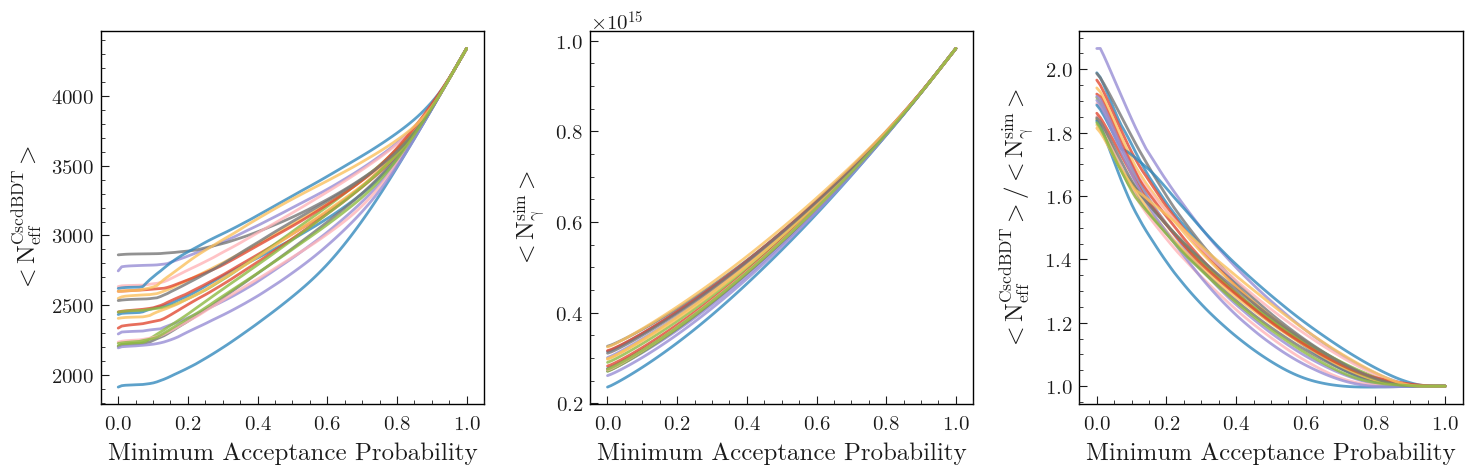

In [159]:
import importlib
importlib.reload(speedup_utils)

df = df_test

df['truth'] = df['CscdBDT']==1

sdfs = {}
maxes = {}
for model_name in best_models:
    res = speedup_utils.get_pred_speedup(df, 
                                pred=model_name, 
                                passed='truth', 
                                col_n_photons='n_photons', 
                                col_flux_weights='flux_weights', 
                                col_sel_weights='selection_weights'
                                )
    sdfs[model_name] = res
    maxes[model_name] = np.max(res['speed_normed'])
fig, ax = speedup_utils.make_tri_plot(nom='n_eff_passed', 
                            denom='n_photons_simulated', 
                            sdfs=sdfs,
                            legend=False,
                            )

In [160]:
len_df = len(df)
print(f"{'model':<40} {'max speedup':<10} {'time per event (us)':<10}")
for m in best_models:
    print(f"{m:<40}: {round(maxes[m], 2):<10.2f} {round(times[m]/len_df*10**6, 2):<10.2f}")

model                                    max speedup time per event (us)
D128_M128_128_E64_64_C128_512_512       : 1.99       0.69      
D8_M128_128_E512_C256                   : 1.97       0.51      
D8_M128_128_E64_64_C1028                : 2.07       0.52      
D8_M128_128_E64_C64                     : 1.99       0.46      
D16_M128_128_E64_64_C64_256_256         : 1.94       0.52      
D32_M128_128_E64_64_C128_512_512        : 1.91       0.69      
D16_M64_64_E64_64_C256                  : 1.89       0.40      
D8_M128_128_E512_C128                   : 1.89       0.50      
D8_M64_128_E64_64_C128                  : 1.92       0.43      
D256_M128_128_E64_64_C64_64_128         : 1.91       0.74      
D32_M64_128_E64_64_C1028                : 1.84       0.69      
D2_M128_128_E64_64_C256                 : 1.82       0.48      
D8_M128_128_E256_256_C512               : 1.84       0.52      
D8_M64_128_E64_64_C64_64_128            : 1.85       0.44      
D256_M128_128_E64_64_C64_256_25

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_441095/2206205430.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('evaluation time per event (${\mu} s$)')


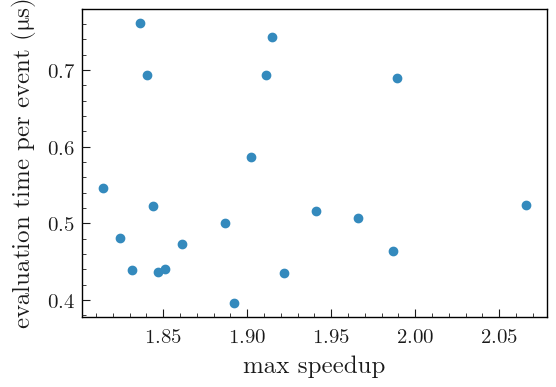

In [161]:
len_df = len(df)
plt.plot([maxes[m] for m in best_models], [times[m]/len_df*10**6 for m in best_models],  'o')
plt.xlabel('max speedup')
plt.ylabel('evaluation time per event (${\mu} s$)')
plt.show()


In [11]:
print(f"{'model':<30} {'max speedup':<10} {'time per event':<10}")
for model_name in best_models:
    max_val = np.max(sdfs[model_name]['speed_normed'])
    print(f"{model_name:<30}: {round(max_val, 2):<10.2f} {round(times[model_name]/len_df*10**6, 2):<10.2f}")


model                          max speedup time per event
D128_M128_128_E64_64_C128_512_512: 1.99       0.69      
D8_M128_128_E512_C256         : 1.97       0.51      
D8_M128_128_E64_64_C1028      : 2.07       0.53      
D8_M128_128_E64_C64           : 1.99       0.47      
D16_M128_128_E64_64_C64_256_256: 1.94       0.52      
D32_M128_128_E64_64_C128_512_512: 1.91       0.58      
D16_M64_64_E64_64_C256        : 1.89       0.39      
D8_M128_128_E512_C128         : 1.89       0.51      
D8_M64_128_E64_64_C128        : 1.92       0.43      
D256_M128_128_E64_64_C64_64_128: 1.91       0.90      
D32_M64_128_E64_64_C1028      : 1.84       0.51      
D2_M128_128_E64_64_C256       : 1.82       0.48      
D8_M128_128_E256_256_C512     : 1.84       0.53      
D8_M64_128_E64_64_C64_64_128  : 1.85       0.45      
D256_M128_128_E64_64_C64_256_256: 1.84       0.76      
D2_M64_128_E512_C512          : 1.86       0.47      
D128_M128_128_E64_C64         : 1.90       0.59      
D2_M64_128_E64_

## Make Cscd Energy Distriburtion

In [200]:
def add_icecube_text(ax, text="IceCube Preliminary",
                    fontsize=14,
                    fontweight='bold',
                    fontname='Arial',
                    color='red',
                    # transform=ax.transAxes,
                    transform=None,
                    x=0.05,
                    y=0.1,
                    **kwargs):
    transform = ax.transAxes if transform is None else transform
    ax.text(x, y, text,  color=color, fontsize=fontsize, fontweight=fontweight, fontname=fontname, transform=transform, **kwargs)


def get_sampled_histogram(df,
                          var_name,
                          weights=None,
                          bins=None,
                          plot_name=None,
                          prediction=None,
                          ):
    pred = df[prediction]
    pred_weights, mask =  speedup_utils.get_weight_from_pred(pred)
    df = df.loc[mask]
    weights = bu.combine_weight_columns(df, weights)
    weights *= pred_weights
    h = pu.make_hist(df[var_name], weights=weights, bins=bins)
    return h


def get_pred_hist(df, var, bins, pred_name, weight_cols, adjust_values=False, **kwargs):
    """
        creates a histogram of the <var> column with the given <bins> and weight columns <weight_cols>
        Rejection Sampling is applied using the probabilities given by the <pred_name> column.
        - bin contents are given by sum(weights)
        - and bin errors are given by sqrt(sum(weights**2) * (1/pred) )
    
    """
    # pred = df[pred_name].astype('float64')
    weights = bu.combine_weight_columns(df, weight_cols)
    weights = weights.astype('float128')

    # bc, bin_edges = np.histogram(df[var], bins=bins, weights=weights * 1.0/df[pred_name] , **kwargs) 
    bc, _ = np.histogram(df[var], bins=bins, weights=weights * (1.0/df[pred_name] if adjust_values else 1.0), **kwargs) 
    bv, bin_edges = np.histogram(df[var], bins=bins, weights=weights**2 * (1.0/df[pred_name]) , **kwargs)
    h = pu.make_hist([], weights=[], bins=bins)
    for i, (v, e) in enumerate(zip(bc, bv)):
        h[i] = [v, e]
    return h




plots_dir = "/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1/"
os.makedirs(plots_dir, exist_ok=True)
print(f'{plots_dir = }')
local_mount = plots_dir.replace("/cephfs/users/nrad/lustre/www/", "file:///Users/nrad/clusters/lustre/www/")
print(f'\nlocal_mount:')
print(local_mount)

plots_dir = '/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1/'

local_mount:
file:///Users/nrad/clusters/lustre/www/plots/TeVPA2025/v1/


In [259]:
best_models

['D128_M128_128_E64_64_C128_512_512',
 'D8_M128_128_E512_C256',
 'D8_M128_128_E64_64_C1028',
 'D8_M128_128_E64_C64',
 'D16_M128_128_E64_64_C64_256_256',
 'D32_M128_128_E64_64_C128_512_512',
 'D16_M64_64_E64_64_C256',
 'D8_M128_128_E512_C128',
 'D8_M64_128_E64_64_C128',
 'D256_M128_128_E64_64_C64_64_128',
 'D32_M64_128_E64_64_C1028',
 'D2_M128_128_E64_64_C256',
 'D8_M128_128_E256_256_C512',
 'D8_M64_128_E64_64_C64_64_128',
 'D256_M128_128_E64_64_C64_256_256',
 'D2_M64_128_E512_C512',
 'D128_M128_128_E64_C64',
 'D2_M64_128_E64_64_C64_64_128',
 'D2_M128_128_E64_64_C128_512_512',
 'D2_M64_128_E64_C512']

In [ ]:
import matplotlib.pyplot as plt
from tfxkit.common import base_utils as bu
from tfxkit.common import plotting_utils as pu
import plothist as ph
import numpy as np
from copy import deepcopy


## make the samples:

import speedup_utils
import numpy as np
np.random.seed(44)

# df = mf.df_test
df_name = 'df_test'
df_name = 'df_train'


if df_name == 'df_train':
    df = df_train
    extra_weights = ['sample_weight']
elif df_name == 'df_test':
    df = df_test
    # df = mf.df_test
    extra_weights = []
else:
    raise ValueError(f'{df_name} is not a valid dataframe name')

# model_name = best_models[1]
model_name = 'D8_M128_128_E512_C256'
print(f"{model_name = }")

pred = df[model_name]
w_, mask =  speedup_utils.get_weight_from_pred(pred)

df['accepted'] = False
df.loc[mask, 'accepted'] = True
df['acceptance_weight'] = w_

# cpu ratio

weights = ['selection_weights']
weights += extra_weights

# n_photons_optimized = df.query('accepted==True')['n_photons'].sum()
# n_photons_nominal = df['n_photons'].sum()
n_photons_optimized = df.query('accepted==True')[weights+['n_photons']].prod(axis=1).sum()
n_photons_nominal = df[weights+['n_photons']].prod(axis=1).sum()

n_photons_ratio = n_photons_optimized/n_photons_nominal
print(f'{n_photons_ratio = }')

# downsampling nominal
df['pred_downsampled'] = n_photons_ratio
# nominal_downsampled_mask = np.random.random(len(df))<n_photons_ratio
_, down_mask = speedup_utils.get_weight_from_pred(df['pred_downsampled'])
# df.loc[nominal_downsampled_mask, 'nominal_downsampled'] = True
df['nominal_downsampled'] = False
df.loc[down_mask, 'nominal_downsampled'] = True


###




plots_info = {
    'nominal': {
        # 'label': 'nominal', 
        'label': 'Nominal Simulation', 
        'weights': ['flux_weights']+extra_weights, 
        'plt_kwargs': {'ls':'-', 'color':'C2'}
    },
    # 'unweighted': {
    #     'name': 'unweighted', 
    #     'label': 'after rejection (unweighted)', 
    #     'weights': ['flux_weights'], 
    #     'query': 'accepted==True',
    #     'plt_kwargs': {'ls':'--', 'color':'C1'}
    # },
    'optimized': {
        'name': 'optimized', 
        # 'label': 'after rejection (weighted)', 
        'label': 'Optimized Simulation', 
        'weights': ['flux_weights', 'acceptance_weight']+extra_weights,
        'query': 'accepted==True',
        'plt_kwargs': {'ls':'--', 'color':'C3'}
    },
    'nominal_downsampled': {
        'name': 'nominal_downsampled', 
        # 'label': 'nominal (downsampled)', 
        'label': 'Nominal Simulation', 
        'weights': ['flux_weights', 1.0/float(n_photons_ratio) ]+extra_weights,
        # 'weights': ['flux_weights' ], 
        'query': 'nominal_downsampled==True',
        'plt_kwargs': {'ls':'--', 'color':'C5'}
    },
}

vars_info = {
    'energy': dict(
        var='energy',
        # bins=np.geomspace(8E2, 1E11, 100),
        bins=np.geomspace(10E3, 1E9, 20),
        xlabel='Energy [GeV]',
        ylabel='Events',
        title='Energy',
    ),
    'cascade_energy': dict(
        var='cscdSBU_MonopodFit4_noDC_energy',
        bins=np.geomspace(10E3, 1E7, 6),
        xlabel='Reconstructed Cascade Energy [GeV]',
        ylabel='Event Rate [Hz]',
        title='ReconstructedCascade Energy',
    ),
}

var_name = 'cascade_energy'
# var_name = 'energy'


weights, mask =  speedup_utils.get_weight_from_pred(pred)



hists = {}
for plot_name, plot_info in plots_info.items():
    var_info = deepcopy(vars_info[var_name])

    df_ = df.query('CscdBDT==1')
    if plot_info.get('query'):
        df_ = df_.query(plot_info['query'])
    else:
        df_ = df_
    weights = bu.combine_weight_columns(df_, plot_info['weights'])
    # pu.plot_hist(df_, weights, var_info['bins'], var_info['xlabel'], var_info['ylabel'], var_info['title'], **plot_info['plt_kwargs'])
    var = var_info.pop('var')
    hists[plot_name] = pu.make_hist(df_[var], weights=weights, bins=var_info['bins'],)



model_name = 'D8_M128_128_E512_C256'
n_photons_ratio = np.float64(0.2893258640605582)


/tmp/ipykernel_441095/1332681819.py:139: RangeWarning: Only 2.62% of data contained in the binning range [10000.0, 10000000.0].
  hists[plot_name] = pu.make_hist(df_[var], weights=weights, bins=var_info['bins'],)
/tmp/ipykernel_441095/1332681819.py:139: RangeWarning: Only 2.55% of data contained in the binning range [10000.0, 10000000.0].
  hists[plot_name] = pu.make_hist(df_[var], weights=weights, bins=var_info['bins'],)
/tmp/ipykernel_441095/1332681819.py:139: RangeWarning: Only 2.49% of data contained in the binning range [10000.0, 10000000.0].
  hists[plot_name] = pu.make_hist(df_[var], weights=weights, bins=var_info['bins'],)


In [256]:
weights = ['flux_weights', 'selection_weights']+extra_weights
df['downsampled'] = n_photons_ratio
print(n_photons_ratio)
df_ = df.query('CscdBDT==1')
adjust_values = False
hists['pred_expected'] = get_pred_hist(df_, var, bins=var_info['bins'], pred_name=model_name, weight_cols=weights, adjust_values=adjust_values)
hists['downsampled_expected'] = get_pred_hist(df_, var, bins=var_info['bins'], pred_name='downsampled', weight_cols=weights, adjust_values=adjust_values)

0.2893258640605582


2025-10-24 16:56:34,541 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison_expected.png
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison_expected.pdf


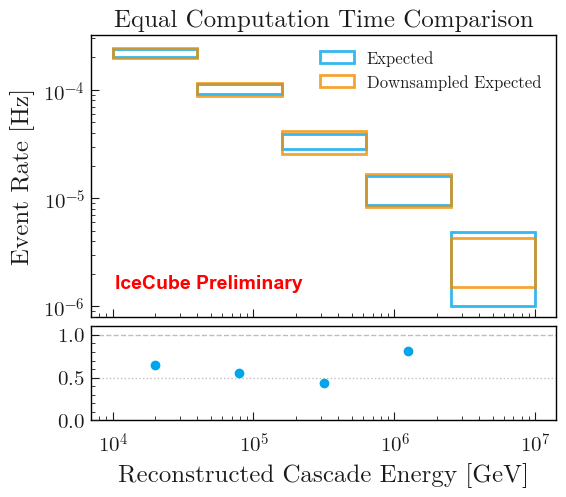

In [257]:

fig, axs = pu.plt_subplots(nrows=2)
ax_main = axs[0]

DESY_BLUE = (0.0, 166/255, 235/255)
DESY_ORANGE = (242/255, 142/255, 0/255)
colors = {  'pred_expected': DESY_BLUE, 
            'downsampled_expected': DESY_ORANGE,
}


ph.plot_hist_uncertainties(hists['pred_expected'],  
                          ax=ax_main,
                          label='Expected',
                          color=colors['pred_expected'],
                          fill=False,
                          alpha=0.8,
                          lw=2,
                          edgecolor=colors['pred_expected'],
                          hatch="")


ph.plot_hist_uncertainties(hists['downsampled_expected'],
                          ax=ax_main,
                          label='Downsampled Expected',
                          color=colors['downsampled_expected'],
                          fill=False,
                          alpha=0.8,
                          lw=2,
                          edgecolor=colors['downsampled_expected'],
                          hatch="")



ax_main.set_xlabel(var_info['xlabel'])
ax_main.set_ylabel(var_info['ylabel'])
ax_main.set_xscale('log')
ax_main.set_yscale('log')


ax_r = axs[1]

edges = h1.axes[0].edges
log_midpoints = np.sqrt(edges[:-1] * edges[1:])

v = hists['pred_expected'].variances()/hists['downsampled_expected'].variances()
ax_r.plot(log_midpoints, v, "o", color=colors['pred_expected'])
ax_r.set_xlabel(var_info['xlabel'])


ax_main.set_ylim(ymin=0.8E-6)
ax_r.set_ylim(-0.0, 1.1)
ax_r.set_yticks([0,0.5, 1.0])  # add more tick numbers from -0.1 to 1.1, step 0.1
ax_r.axhline(1.0, color='grey', ls='--', lw=1, alpha=0.5)
ax_r.axhline(0.5, color='grey', ls=':', lw=1, alpha=0.5)
ax_r.axhline(0.0, color='grey', ls=':', lw=1, alpha=0.5)


ax_main.legend()


add_icecube_text(ax_main)



from tfxkit.core.logger import setup_logging


setup_logging()

ax_main.set_title("Equal Computation Time Comparison")
pu.save_fig(fig, f"{plots_dir}/energy_cascade_energy_comparison_expected", dpi=200)



2025-10-24 16:56:43,503 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison.png
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison.pdf


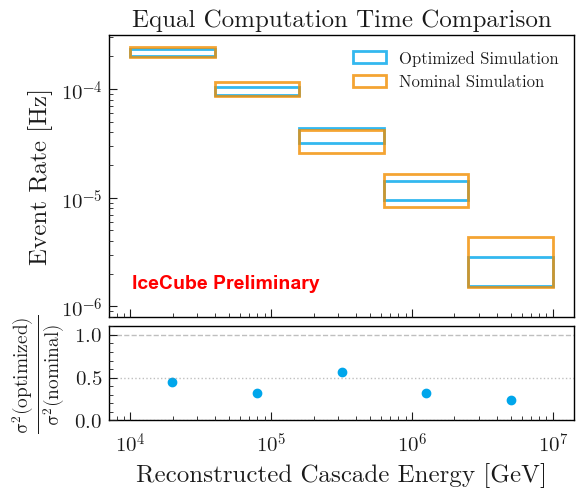

In [258]:

# sub_plots  # pyright: ignore[reportUndefinedVariable]
fig, axs = pu.plt_subplots(nrows=2)
ax_main = axs[0]

DESY_BLUE = (0.0, 166/255, 235/255)
DESY_ORANGE = (242/255, 142/255, 0/255)
colors = {  'nominal': DESY_ORANGE, 
            'nominal_downsampled': 'red',
            'unweighted': 'C1', 
            'optimized': DESY_BLUE,
}

variances = {}
hnames = [ 'nominal_downsampled', 'optimized', ]
hnames = [ 'optimized', 'nominal_downsampled', 'nominal']
hnames = [ 'optimized', 'nominal']
# hnames = [ 'optimized', 'nominal']
# hnames = ['nominal_downsampled', 'optimized']
# hnames = [ 'optimized', 'nominal']
for hname in hnames:
    h = hists[hname]

    plot_info = plots_info[hname]
    # plt_kwargs = plot_info['plt_kwargs']
    hlabel = plot_info['label']
    color = colors[hname]
    # ph.plot_hist(h, ax=ax, label=hlabel, histtype='step', color=color)

    if hname == 'nominal':
        h = h.copy()
        h[...] = np.stack([h.values(), h.variances()*1.0/n_photons_ratio], axis=-1)

    # h = h.copy()
    # h[...] = np.stack([h.values()*0+1.0, h.variances()], axis=-1)


    ph.plot_hist_uncertainties(h, ax=ax_main, label=hlabel, color=color, fill=False, alpha=0.8, lw=2, hatch_linewidth=0, edgecolor=color, hatch="")
    variances[hname] = h.variances()
    # ph.plot_error_hist(h, ax=ax_main, label=hlabel, color=color, lw=2, marker='o', ms=2, capsize=4, alpha=0.5)
    # break




ax_main.set_xlabel(var_info['xlabel'])
ax_main.set_ylabel(var_info['ylabel'])
ax_main.set_xscale('log')
ax_main.set_yscale('log')

# variances['nominal'] = n_photons_ratio * variances['nominal'] / 10000

ax_r = axs[1]

h1_name = ''
h2_name = hnames[1]

h1 = hists[hnames[0]]
v = variances['optimized']/variances['nominal']


do_sqrt = False

y_label_size = 20
if do_sqrt:
    v = np.sqrt(v)
    ax_r.set_ylabel(r"$\frac{\sigma(optimized)}{\sigma(nominal)}$", fontsize=y_label_size)
else:
    ax_r.set_ylabel(r"$\frac{\sigma^2(optimized)}{\sigma^2(nominal)}$", fontsize=y_label_size)

edges = h1.axes[0].edges
log_midpoints = np.sqrt(edges[:-1] * edges[1:])


ax_r.plot(log_midpoints, v, "o", color=colors['optimized'])
ax_r.set_xlabel(var_info['xlabel'])


ax_main.set_ylim(ymin=0.8E-6)
# ax_r.set_ylabel(f'ratio of {h1_name}/{h2_name}')
# ax_r.set_ylim(0,2)
ax_r.set_ylim(-0.0, 1.1)
ax_r.set_yticks([0,0.5, 1.0])  # add more tick numbers from -0.1 to 1.1, step 0.1
ax_r.axhline(1.0, color='grey', ls='--', lw=1, alpha=0.5)
ax_r.axhline(0.5, color='grey', ls=':', lw=1, alpha=0.5)
ax_r.axhline(0.0, color='grey', ls=':', lw=1, alpha=0.5)


ax_main.legend()


add_icecube_text(ax_main)



from tfxkit.core.logger import setup_logging


setup_logging()
    # ax.text(0.05, 0.1, "IceCube Preliminary",  color='red', fontsize=14, fontweight='bold', fontname='Arial', transform=ax.transAxes)

ax_main.set_title("Equal Computation Time Comparison")
pu.save_fig(fig, f"{plots_dir}/energy_cascade_energy_comparison", dpi=200)



2025-10-24 14:49:43,628 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison.png
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//energy_cascade_energy_comparison.pdf


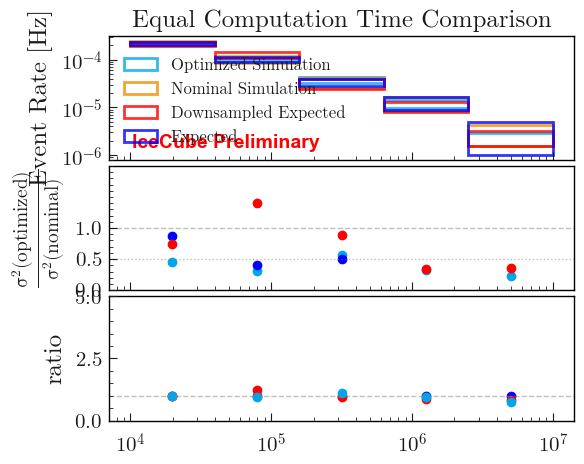

In [109]:

# sub_plots  # pyright: ignore[reportUndefinedVariable]
fig, axs = pu.plt_subplots(nrows=3)
ax_main = axs[0]

DESY_BLUE = (0.0, 166/255, 235/255)
DESY_ORANGE = (242/255, 142/255, 0/255)
colors = {  'nominal': DESY_ORANGE, 
            'nominal_downsampled': 'red',
            'unweighted': 'C1', 
            'optimized': DESY_BLUE,
}

variances = {}
hnames = [ 'nominal_downsampled', 'optimized', ]
hnames = [ 'optimized', 'nominal_downsampled', 'nominal']
hnames = [ 'optimized', 'nominal']
# hnames = [ 'optimized', 'nominal']
# hnames = ['nominal_downsampled', 'optimized']
# hnames = [ 'optimized', 'nominal']
for hname in hnames:
    h = hists[hname]

    plot_info = plots_info[hname]
    # plt_kwargs = plot_info['plt_kwargs']
    hlabel = plot_info['label']
    color = colors[hname]
    # ph.plot_hist(h, ax=ax, label=hlabel, histtype='step', color=color)

    if hname == 'nominal':
        h = h.copy()
        h[...] = np.stack([h.values(), h.variances()*1.0/n_photons_ratio], axis=-1)

    # h = h.copy()
    # h[...] = np.stack([h.values()*0+1.0, h.variances()], axis=-1)


    ph.plot_hist_uncertainties(h, ax=ax_main, label=hlabel, color=color, fill=False, alpha=0.8, lw=2, hatch_linewidth=0, edgecolor=color, hatch="")
    variances[hname] = h.variances()
    # ph.plot_error_hist(h, ax=ax_main, label=hlabel, color=color, lw=2, marker='o', ms=2, capsize=4, alpha=0.5)
    # break


ph.plot_hist_uncertainties(hists['downsampled_expected'], ax=ax_main, label='Downsampled Expected', color='red', fill=False, alpha=0.8, lw=2, hatch_linewidth=0, edgecolor='red', hatch="")
ph.plot_hist_uncertainties(hists['pred_expected'], ax=ax_main, label='Expected', color='blue', fill=False, alpha=0.8, lw=2, hatch_linewidth=0, edgecolor='blue', hatch="")


ax_main.set_xlabel(var_info['xlabel'])
ax_main.set_ylabel(var_info['ylabel'])
ax_main.set_xscale('log')
ax_main.set_yscale('log')

# variances['nominal'] = n_photons_ratio * variances['nominal'] / 10000

ax_r = axs[1]

h1_name = ''
h2_name = hnames[1]

h1 = hists[hnames[0]]
v = variances['optimized']/variances['nominal']


do_sqrt = False

y_label_size = 20
if do_sqrt:
    v = np.sqrt(v)
    ax_r.set_ylabel(r"$\frac{\sigma(optimized)}{\sigma(nominal)}$", fontsize=y_label_size)
else:
    ax_r.set_ylabel(r"$\frac{\sigma^2(optimized)}{\sigma^2(nominal)}$", fontsize=y_label_size)

edges = h1.axes[0].edges
log_midpoints = np.sqrt(edges[:-1] * edges[1:])


if False:
    v3 = variances['optimized']/variances['nominal_downsampled']
    v2 = variances['nominal_downsampled']/variances['nominal']
    ax_r.plot(log_midpoints, v3, "*", color=colors['optimized'])
    ax_r.plot(log_midpoints, v2, "o", color=colors['nominal'])

ax_r.plot(log_midpoints, v, "o", color=colors['optimized'])
ax_r.set_xlabel(var_info['xlabel'])


if True:
    variances['pred_expected'] = hists['pred_expected'].variances()
    variances['downsampled_expected'] = hists['downsampled_expected'].variances()
    ax_r.plot(log_midpoints, variances['pred_expected']/variances['downsampled_expected'], "o", color='blue')
    ax_r.plot(log_midpoints, variances['downsampled_expected']/variances['nominal'], "o", color='red')

ax_main.set_ylim(ymin=0.8E-6)
# ax_r.set_ylabel(f'ratio of {h1_name}/{h2_name}')
# ax_r.set_ylim(0,2)
ax_r.set_ylim(-0.0, 1.1)
ax_r.set_yticks([0,0.5, 1.0])  # add more tick numbers from -0.1 to 1.1, step 0.1
ax_r.axhline(1.0, color='grey', ls='--', lw=1, alpha=0.5)
ax_r.axhline(0.5, color='grey', ls=':', lw=1, alpha=0.5)
ax_r.axhline(0.0, color='grey', ls=':', lw=1, alpha=0.5)


ax_main.legend()


add_icecube_text(ax_main)



from tfxkit.core.logger import setup_logging


setup_logging()
    # ax.text(0.05, 0.1, "IceCube Preliminary",  color='red', fontsize=14, fontweight='bold', fontname='Arial', transform=ax.transAxes)

ax_main.set_title("Equal Computation Time Comparison")
pu.save_fig(fig, f"{plots_dir}/energy_cascade_energy_comparison", dpi=200)


ax_r2 = axs[2]
vals = hists['pred_expected'].values()/hists['nominal'].values()
ax_r2.plot(log_midpoints, vals, "o", color='blue')

vals2 = hists['downsampled_expected'].values()/hists['nominal'].values()
ax_r2.plot(log_midpoints, vals2, "o", color='red')

vals3 = hists['optimized'].values()/hists['nominal'].values()
ax_r2.plot(log_midpoints, vals3, "o", color=colors['optimized'] )

ax_r2.set_ylabel('ratio')
ax_r2.set_ylim(0, 5)
ax_r.set_ylim(0,2)
ax_r2.axhline(1.0, color='grey', ls='--', lw=1, alpha=0.5)



/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2.81% of data contained in the binning range [10000.0, 10000000.0].
  h = pu.make_hist(df[var_name], weights=weights, bins=bins)
/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2.61% of data contained in the binning range [10000.0, 10000000.0].
  h = pu.make_hist(df[var_name], weights=weights, bins=bins)
/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2.61% of data contained in the binning range [10000.0, 10000000.0].
  h = pu.make_hist(df[var_name], weights=weights, bins=bins)
/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2.50% of data contained in the binning range [10000.0, 10000000.0].
  h = pu.make_hist(df[var_name], weights=weights, bins=bins)
/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2.49% of data contained in the binning range [10000.0, 10000000.0].
  h = pu.make_hist(df[var_name], weights=weights, bins=bins)
/tmp/ipykernel_441095/3867512432.py:27: RangeWarning: Only 2

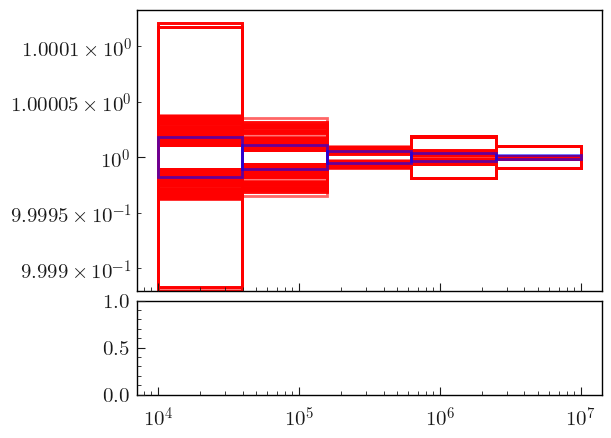

In [223]:
var_name = 'cascade_energy'
var_info = vars_info[var_name]

df_ = df.query('CscdBDT==1')


hists_sampled = []
for i in range(5000):
    h = get_sampled_histogram(df_, 
       var_info['var'], 
                bins=var_info['bins'],
                prediction=model_name,
                weights=['flux_weights', 'selection_weights']
                )
    hists_sampled.append(h)

fig, axs = pu.plt_subplots()
ax_main = axs[0]

sample_variances = []
for h in hists_sampled[:]:
    sample_variances.append( h.variances() )
    h = h.copy()
    h[...] = np.stack([np.ones_like(h.values()), h.variances()], axis=-1)
    ph.plot_hist_uncertainties(h, ax=ax_main, label=hlabel, fill=False, alpha=0.6, lw=2, hatch_linewidth=0, edgecolor='red', )

h_exp = hists['pred_expected'].copy()
h_exp[...] = np.stack([np.ones_like(h_exp.values()), h_exp.variances()], axis=-1)
ph.plot_hist_uncertainties(h_exp, ax=ax_main, label='expected', fill=False, alpha=0.6, lw=2, hatch_linewidth=0, edgecolor='blue', )


ax_main.set_xscale('log')
ax_main.set_yscale('log')


In [227]:
def get_pred_hist_2(df, var, bins, pred_name, weight_cols, adjust_values=False, **kwargs):
    """
        creates a histogram of the <var> column with the given <bins> and weight columns <weight_cols>
        Rejection Sampling is applied using the probabilities given by the <pred_name> column.
        - bin contents are given by sum(weights)
        - and bin errors are given by sqrt(sum(weights**2) * (1/pred) )
    
    """
    # pred = df[pred_name].astype('float64')

    weights = bu.combine_weight_columns(df, weight_cols)
    weights = weights.astype('float128')

    # bc, bin_edges = np.histogram(df[var], bins=bins, weights=weights * 1.0/df[pred_name] , **kwargs) 
    bc, _ = np.histogram(df[var], bins=bins, weights=weights * (1.0/df[pred_name] if adjust_values else 1.0), **kwargs) 
    bv, bin_edges = np.histogram(df[var], bins=bins, weights=weights.astype('float128')**2 * (1.0/df[pred_name]) , **kwargs)
    h = pu.make_hist([], weights=[], bins=bins)
    for i, (v, e) in enumerate(zip(bc, bv)):
        h[i] = [v, e]
    return h



h_pred = get_pred_hist_2(df_test, vars_info[var_name]['var'],
                         bins=vars_info[var_name]['bins'],
                         pred_name=model_name,
                         weight_cols=['flux_weights', 'selection_weights'])



In [235]:
df_train.query('CscdBDT==1 & cscdSBU_MonopodFit4_noDC_energy>1E6')

,Run,Event,SubEvent,SubEventStream,exists,energy,minorID,majorID,azimuth,zenith,...,D32_M64_128_E64_64_C1028,D2_M128_128_E64_64_C256,D8_M128_128_E256_256_C512,D8_M64_128_E64_64_C64_64_128,D256_M128_128_E64_64_C64_256_256,D2_M64_128_E512_C512,D128_M128_128_E64_C64,D2_M64_128_E64_64_C64_64_128,D2_M128_128_E64_64_C128_512_512,D2_M64_128_E64_C512
index,,,,,,,,,,,,,,,,,,,,,
120204,0.0,1748426.0,0.0,0.0,1.0,8.571335e+07,214677.0,1.812429e+19,2.153792,0.599310,...,0.239735,0.552814,0.561104,0.454597,0.600673,0.805829,0.742780,0.555013,0.517163,0.626154
602018,0.0,2170494.0,0.0,0.0,1.0,1.706659e+07,1677615.0,7.480825e+18,1.600828,0.533313,...,0.030850,0.015663,0.019872,0.006133,0.005770,0.005279,0.117256,0.095656,0.027130,0.009969
280467,0.0,2137581.0,0.0,0.0,1.0,7.572519e+07,494405.0,6.462792e+18,5.445049,0.721663,...,0.872962,0.922001,0.862735,0.825187,0.886074,0.946000,0.824157,0.859805,0.890018,0.871345
92117,0.0,1827151.0,0.0,0.0,1.0,1.737743e+08,201643.0,1.186774e+19,4.354904,0.526553,...,0.862109,0.889037,0.828631,0.829782,0.886409,0.878925,0.851779,0.844733,0.859143,0.820922
208493,0.0,642149.0,0.0,0.0,1.0,1.737146e+07,63268.0,1.334465e+19,2.283761,0.782764,...,0.840162,0.898098,0.667089,0.824723,0.869836,0.862653,0.881283,0.883208,0.857118,0.863325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29413,0.0,916671.0,0.0,0.0,1.0,5.124588e+06,541338.0,5.632534e+18,0.396877,1.065963,...,0.946675,0.909649,0.922712,0.903624,0.931088,0.906309,0.959630,0.922213,0.918267,0.888418
355217,0.0,2032671.0,0.0,0.0,1.0,3.811934e+07,100402.0,2.871312e+18,2.400998,0.464458,...,0.499199,0.552739,0.136529,0.233262,0.487149,0.713884,0.726221,0.441136,0.196610,0.666775
462782,0.0,738215.0,0.0,0.0,1.0,1.550164e+08,17797.0,8.141701e+17,1.925991,0.710241,...,0.835525,0.836046,0.716243,0.783179,0.789350,0.885029,0.856580,0.850775,0.832073,0.772126


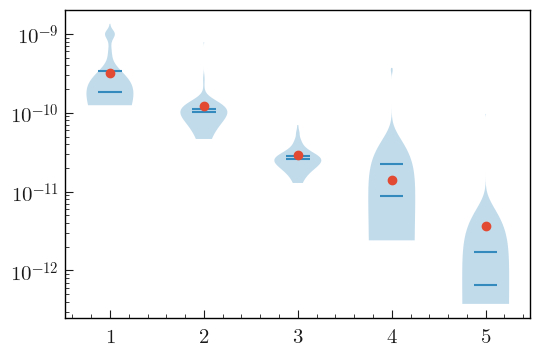

In [228]:
fig, ax = plt.subplots()

vars = np.array(variances)
# vars /= vars.mean(axis=0)
# ax.violinplot( vars )
ax.violinplot(vars, 
                showextrema=False, 
                showmeans=True, 
                showmedians=True, 
                points=1000,
                # quantiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.9]
                ) 

# h_pred_variances = hists['pred_expected'].variances()
h_pred_variances = h_pred.variances()
ax.plot( np.arange(1, len(h_pred_variances)+1), h_pred_variances, "o")
ax.set_yscale('log')



In [220]:
df_ = df_test.query('cscdSBU_MonopodFit4_noDC_energy>1E6')

np.mean( df_['sel_flux_weights'] )



np.float64(7.827809464419346e-08)

In [ ]:
plt_out = pu.plot_classwise_hist(df_test, 
                df_train,
                model_name, 
                        weight_columns=['sel_flux_weights'], 
                        weight_column_train=['sel_flux_weights', 'sample_weight'],
                        label='truth',
                        # bins=np.geomspace(10E3, 1E9, 20),
                        ax=ax_main,
                        # query='cscdSBU_MonopodFit4_noDC_energy>1E6'
                        comparison='ratio'
                        )
plt_out['ax_comp'].set_ylim(0,1E6)

dict_keys(['nominal', 'optimized', 'nominal_downsampled', 'pred_sampled', 'pred_expected', 'downsampled_expected'])


array([0.95528615, 1.18156806, 0.7807588 , 1.25913059, 0.55864231])

In [155]:
model_name

['D128_M128_128_E64_64_C128_512_512',
 'D8_M128_128_E512_C256',
 'D8_M128_128_E64_64_C1028',
 'D8_M128_128_E64_C64',
 'D16_M128_128_E64_64_C64_256_256',
 'D32_M128_128_E64_64_C128_512_512',
 'D16_M64_64_E64_64_C256',
 'D8_M128_128_E512_C128',
 'D8_M64_128_E64_64_C128',
 'D256_M128_128_E64_64_C64_64_128',
 'D32_M64_128_E64_64_C1028',
 'D2_M128_128_E64_64_C256',
 'D8_M128_128_E256_256_C512',
 'D8_M64_128_E64_64_C64_64_128',
 'D256_M128_128_E64_64_C64_256_256',
 'D2_M64_128_E512_C512',
 'D128_M128_128_E64_C64',
 'D2_M64_128_E64_64_C64_64_128',
 'D2_M128_128_E64_64_C128_512_512',
 'D2_M64_128_E64_C512']

In [17]:
## Speedup plot

import speedup_utils

model_name = best_models[2]

speedup_utils.add_coin_flip_preds(df, "truth", "pseudo_pred_coin_flip")
speedup_utils.add_uniform_preds(df, "truth", "pseudo_pred_uniform")

sdfs = {}
for pred_name in [model_name, "pseudo_pred_uniform"]:
    if pred_name == model_name:
        selection_dict = {
            'inclusive': "energy>0",
            # 'energy_1E4': "energy>1E4", # 1E4 GeV = 10 TeV
            # 'energy_1E5': "energy>1E5", # 1E5 GeV = 100 TeV
            # 'energy_1E6': "energy>1E6", # 1E6 GeV = 1 PeV
            # 'energy_1E7': "energy>1E7", # 1E7 GeV = 10 PeV

            'mu_energy_1E4': "shower_mu1_energy>1E4", # 1E4 GeV = 10 TeV
            # 'mu_energy_1E5': "shower_mu1_energy>1E5", # 1E5 GeV = 100 TeV
            # 'mu_energy_1E6': "shower_mu1_energy>1E6", # 1E6 GeV = 1 PeV
            # 'mu_energy_1E7': "shower_mu1_energy>1E7", # 1E7 GeV = 10 PeV
            # r'energy_10E5': "energy>10E5",
        }
    else:
        selection_dict = {pred_name: ""}

    if selection_dict:
        for label, selection in selection_dict.items():
            df_ = df.query(selection) if selection else df
            res = speedup_utils.get_pred_speedup(df_, 
                                pred=pred_name, 
                                passed='truth', 
                                col_n_photons='n_photons', 
                                col_flux_weights='flux_weights', 
                                col_sel_weights='selection_weights',
                                )
            sdfs[label] = res


In [232]:
speedup_utils.infos

{'fake_pred': {'color': 'green', 'label': 'Optimistic', 'ls': ':', 'lw': 2},
 'uniform_pred': {'color': 'red',
  'label': 'Uniform Sampling',
  'ls': ':',
  'lw': 2},
 'pseudo_pred_gauss': {'color': 'green',
  'label': 'Optimistic Sampling',
  'ls': ':',
  'lw': 2},
 'pseudo_pred_2gauss': {'color': 'green',
  'label': '2Gauss',
  'ls': '--',
  'lw': 2},
 'pseudo_pred_uniform': {'color': 'red',
  'label': 'Uniform Sampling',
  'ls': ':',
  'lw': 2},
 'pred': {'color': 'blue', 'label': 'Model', 'ls': '', 'lw': 2}}

In [248]:
sdfs.keys()

dict_keys(['inclusive', 'energy_1E4', 'energy_1E5', 'energy_1E6', 'energy_1E7', 'mu_energy_1E4', 'mu_energy_1E5', 'mu_energy_1E6', 'mu_energy_1E7', 'pseudo_pred_uniform'])

In [19]:
for k in sdfs.keys():
    for col in ['n_photons_simulated', 'n_eff_passed']:
        sdfs[k][col] = sdfs[k][col] / sdfs[k][col].iloc[-1]




<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_441095/1971071578.py:20: SyntaxWarning: invalid escape sequence '\m'
  'mu_energy_1E5': {'color': DESY_ORANGE, 'label': 'E_{"\mu"}>100 TeV', 'ls': '-', 'lw': 3},
/tmp/ipykernel_441095/1971071578.py:22: SyntaxWarning: invalid escape sequence '\m'
  'mu_energy_1E6': {'color': DESY_ORANGE, 'label': 'E_{"\mu"}>1 PeV', 'ls': '-', 'lw': 3},
/cephfs/users/nrad/work/i3rej/speedup_utils.py:759: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=3)


inclusive {'color': (0.0, 0.6509803921568628, 0.9215686274509803), 'label': 'Optimized', 'ls': '-', 'lw': 3, 'alpha': 0.8}
mu_energy_1E4 {'color': (0.9490196078431372, 0.5568627450980392, 0.0), 'label': 'Optimized ($E_{\\mu}>10$ TeV)', 'ls': '--', 'lw': 3, 'alpha': 0.8}
pseudo_pred_uniform {'color': 'black', 'label': 'Uniform Sampling', 'ls': ':', 'lw': 2, 'alpha': 0.8}


2025-10-24 13:51:26,003 - tfxkit.common.plotting_utils - INFO - Plot saved in:
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//speedup.png
	/cephfs/users/nrad/lustre/www/plots/TeVPA2025/v1//speedup.pdf


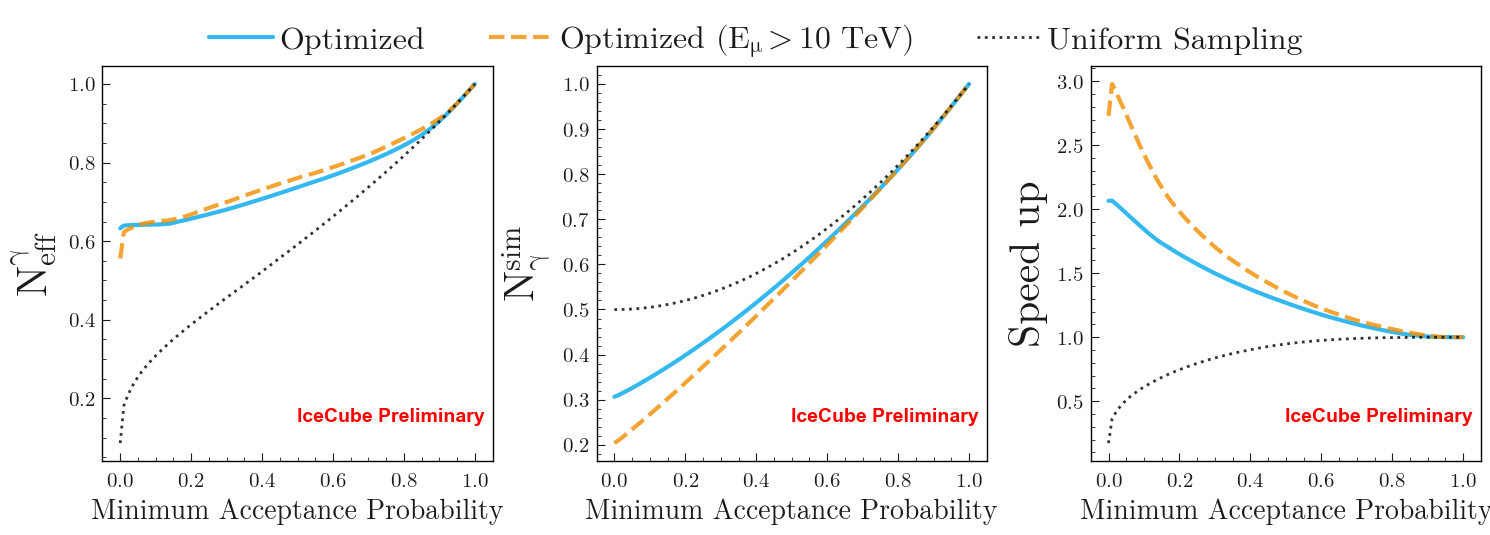

In [27]:
import importlib
importlib.reload(speedup_utils)

DESY_BLUE = (0.0, 166/255, 235/255)
DESY_ORANGE = (242/255, 142/255, 0/255)




infos = {
 'pseudo_pred_uniform': {'color': 'black',
                    'label': 'Uniform Sampling',
                    'ls': ':',
                    'lw': 2},
 'pred': {'color': 'blue', 'label': 'Model', 'ls': '', 'lw': 3},
 'inclusive': {'color': DESY_BLUE, 'label': 'Optimized', 'ls': '-', 'lw': 3},

'mu_energy_1E4': {'color': DESY_ORANGE , 'label': r"Optimized ($E_{\mu}>10$ TeV)", 'ls': '--', 'lw': 3},
'energy_1E4': {'color': DESY_BLUE, 'label': 'E_{"primary"}>10 TeV', 'ls': '-', 'lw': 3},
'mu_energy_1E5': {'color': DESY_ORANGE, 'label': 'E_{"\mu"}>100 TeV', 'ls': '-', 'lw': 3},
'energy_1E5': {'color': DESY_BLUE, 'label': 'E_{"primary"}>100 TeV', 'ls': '-', 'lw': 3},
'mu_energy_1E6': {'color': DESY_ORANGE, 'label': 'E_{"\mu"}>1 PeV', 'ls': '-', 'lw': 3},
'energy_1E6': {'color': DESY_BLUE, 'label': 'E_{"primary"}>1 PeV', 'ls': '-', 'lw': 3},
'mu_energy_1E7': {'color': DESY_ORANGE, 'label': 'E_{"mu"}>10 PeV', 'ls': '-', 'lw': 3},
'energy_1E7': {'color': DESY_BLUE, 'label': 'E_{"primary"}>10 PeV', 'ls': '-', 'lw': 3},



 }

def make_labels(label_name):
    labels = {
        'n_photons_simulated': r"$N_{\gamma}^{sim}$",
        'n_eff_passed': r"$N_{eff}^{\gamma}$",
        'min_pred': "Minimum Acceptance Probability",
    }
    return labels

speedup_utils.make_labels = make_labels

sdfs_ = {k:v for k,v in sdfs.items() if k in ['pseudo_pred_uniform', 'inclusive', 'mu_energy_1E4']}
fig, axs = speedup_utils.make_tri_plot(nom="n_eff_passed", 
                                        denom="n_photons_simulated", 
                                        legend=dict(bbox_to_anchor=(0.5, 1.1), fontsize=23, handletextpad=0.2),

                                        sdfs=sdfs_ ,
                                        infos=infos,
                                        )

axs[-1].set_ylabel("Speed up")
for ax in axs:
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    add_icecube_text(ax, x=0.98, y=0.1, ha='right')


pu.save_fig(fig, f"{plots_dir}/speedup", dpi=200)

In [272]:
model_name

'D8_M128_128_E64_64_C1028'

test n_pos=0.14179885910216947, n_neg=10999.39395569155
train n_pos=0.1251691498746193, n_neg=9829.77168612289


/tmp/ipykernel_3263655/1777263226.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1E8)


Text(0, 0.5, 'ratio')

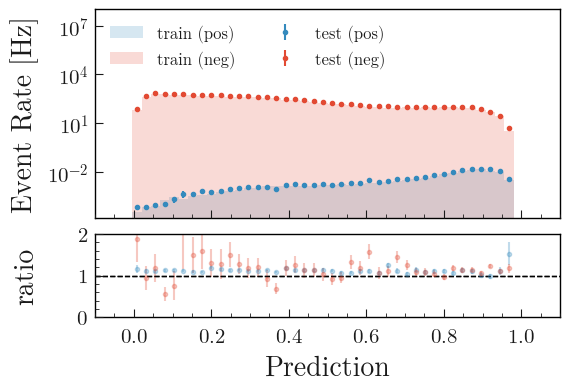

In [323]:
from tfxkit.common.base_utils import combine_weight_columns

weight_columns_test = ['flux_weights', 'selection_weights', 1.0/0.1]
weight_columns_train = ['flux_weights', 'selection_weights', 'sample_weight',]

# weight_normalize_test = 1.0/combine_weight_columns(df_test, weight_columns_test).sum()
# weight_normalize_train = 1.0/combine_weight_columns(df_train, weight_columns_train).sum()


for df_name, df_ in [ ('test', df_test), ('train', df_train)]:
    weight_column = weight_columns_test if df_name == 'test' else weight_columns_train

    cls0_mask = df_.query('truth==0').index
    cls1_mask = df_.query('truth==1').index

    n_pos = combine_weight_columns( df_.loc[cls1_mask], weight_column).sum()
    n_neg = combine_weight_columns( df_.loc[cls0_mask], weight_column).sum()
    
    df_.loc[cls1_mask, 'weight_normalize'] = n_neg/(n_pos+n_neg)
    df_.loc[cls0_mask, 'weight_normalize'] = n_pos/(n_pos+n_neg)

    print(f'{df_name} n_pos={n_pos}, n_neg={n_neg}')

normalize = False
if normalize:
    weight_columns_test = weight_columns_test + ['weight_normalize']
    weight_columns_train = weight_columns_train + ['weight_normalize']

plot_res = pu.plot_classwise_hist(df_test, 
                        df_train, 
                        variable=model_name, 
                        weight_column=weight_columns_test,
                        weight_column_train=weight_columns_train,
                        comparison='ratio',
                        # density=True,
                        )

ax = plot_res['ax_main']
ax_r = plot_res['ax_comp']
if normalize:
    ax.set_ylabel('Arbitrary Units', fontsize=20)
    ax.set_ylim(0, 1E1)
else:
    ax.set_ylabel('Event Rate [Hz]', fontsize=20)
    ax.set_ylim(0, 1E8)

ax_r.set_xlabel('Prediction', fontsize=20)
ax_r.set_ylabel('ratio', fontsize=20)



/tmp/ipykernel_3123069/2384168307.py:38: RuntimeWarning: invalid value encountered in divide
  v = variances['nominal_downsampled']/variances['nominal']


Text(0, 0.5, 'ratio of variances')

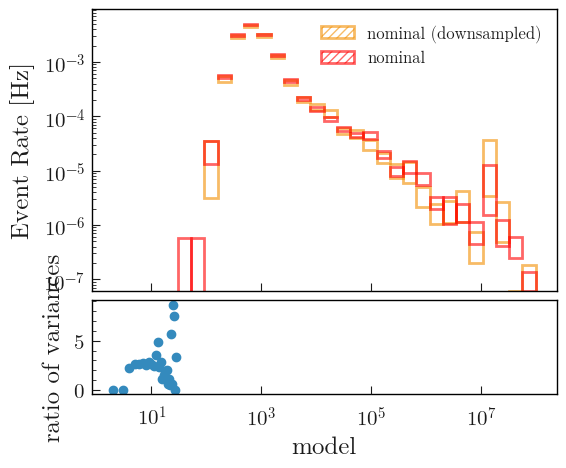

In [ ]:

# sub_plots  # pyright: ignore[reportUndefinedVariable]
fig, axs = pu.plt_subplots()
ax_main = axs[0]


colors = {  'nominal': 'red', 
            'nominal_downsampled': (242/255, 142/255, 0/255),
            'unweighted': 'C1', 
            'optimized':(0.0, 166/255, 235/255)
}
# for hname, h in hists.items():
#     if hname in ['unweighted', 'nominal']:
#         continue

variances = {}
hnames = ['nominal_downsampled', 'nominal']
for hname in hnames:
    h = hists[hname]

    plot_info = plots_info[hname]
    # plt_kwargs = plot_info['plt_kwargs']
    hlabel = plot_info['label']
    color = colors[hname]
    # ph.plot_hist(h, ax=ax, label=hlabel, histtype='step', color=color)
    ph.plot_hist_uncertainties(h, ax=ax_main, label=hlabel, color=color, fill=False, alpha=0.6, lw=2, hatch_linewidth=0, edgecolor=color, )
    variances[hname] = h.variances()
    # ph.plot_error_hist(h, ax=ax_main, label=hlabel, color=color, lw=2, marker='o', ms=2, capsize=4, alpha=0.5)
    # break

ax_main.set_xlabel(var_info['xlabel'])
ax_main.set_ylabel(var_info['ylabel'])
ax_main.set_xscale('log')
ax_main.set_yscale('log')
ax_main.legend()


ax_r = axs[1]

h1_name = hnames[0]
h2_name = hnames[1]

h1 = hists[h1_name]
v = variances[h1_name]/variances[h2_name]

ax_r.hist(v, bins=np.linspace(0, 10, 100))
ax_r.set_xlabel('model')
ax_r.set_ylabel('ratio of variances')


In [282]:
ph.get_ratio_variances

<function plothist.comparison.get_ratio_variances(h1: 'bh.Histogram', h2: 'bh.Histogram') -> 'np.ndarray'>

In [280]:
dir(h)
np.sqrt(h.variances())

array([0.00000000e+00, 0.00000000e+00, 2.87757619e-07, 2.57393871e-07,
       1.05745763e-05, 4.30282310e-05, 1.12412856e-04, 1.31850782e-04,
       1.00245743e-04, 5.53368286e-05, 2.64421630e-05, 1.50284883e-05,
       1.03708375e-05, 7.78759541e-06, 4.77228731e-06, 4.66131148e-06,
       6.14125745e-06, 2.87233773e-06, 2.02207554e-06, 2.97288159e-06,
       1.78323773e-06, 6.72164094e-07, 1.13351179e-06, 6.51573701e-07,
       3.48260958e-07, 5.61821719e-06, 4.03169794e-07, 1.80040779e-07,
       3.86924849e-08])